In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.sample(5).T

,3061,6356,2393,6977,4263
customerID,8118-LSUEL,3587-PMCOY,5136-KCKGI,2843-CQMEG,2121-JAFOM
gender,Male,Male,Female,Male,Female
SeniorCitizen,1,0,0,0,0
Partner,No,No,Yes,No,Yes
Dependents,No,No,Yes,No,No
tenure,23,10,33,24,72
PhoneService,Yes,Yes,Yes,Yes,Yes
MultipleLines,Yes,No,Yes,No,Yes
InternetService,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,No,Yes


In [3]:
df = df.drop(['customerID'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df["TotalCharges"].fillna(df[df['TotalCharges'].isna()]['MonthlyCharges'],inplace=True)

In [9]:
df = df.replace(to_replace ="No phone service",value ="No")
df = df.replace(to_replace="No internet service",value = "No")
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2559,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,115.55,8425.30,No
5953,Male,0,No,No,1,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.70,50.70,No
2863,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.60,44.60,No
4444,Female,0,No,No,3,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.85,63.75,Yes
1041,Female,0,No,Yes,16,Yes,No,No,No,No,No,No,No,No,One year,Yes,Bank transfer (automatic),19.30,360.35,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Finding outliers with IQR method

Text(0.5, 1.0, 'Boxplot of Total Charges')

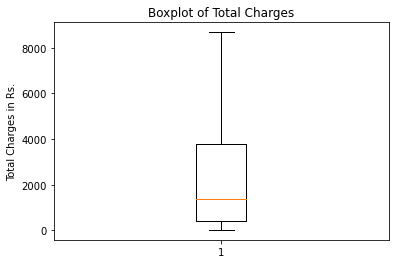

In [14]:
plt.boxplot(df['TotalCharges'])
plt.ylabel('Total Charges in Rs.')
plt.title('Boxplot of Total Charges')

In [15]:
q1 , q3 = np.percentile(sorted(df['TotalCharges']),[25,75])
iqr = q3-q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print(f'Lower Bound:{lower_bound} Upper Bound: {upper_bound}')
for i in sorted(df['TotalCharges']):
    if i<lower_bound or i>upper_bound:
        print(i)

Lower Bound:-4683.525 Upper Bound: 8868.675


Text(0.5, 1.0, 'Boxplot of Monthly Charges')

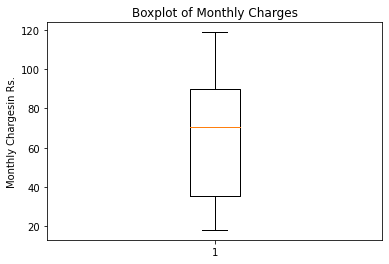

In [16]:
plt.boxplot(df['MonthlyCharges'])
plt.ylabel('Monthly Chargesin Rs.')
plt.title('Boxplot of Monthly Charges')

In [17]:
q1 , q3 = np.percentile(sorted(df['MonthlyCharges']),[25,75])
iqr = q3-q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print(f'Lower Bound:{lower_bound} Upper Bound: {upper_bound}')
for i in sorted(df['MonthlyCharges']):
    if i<lower_bound or i>upper_bound:
        print(i)

Lower Bound:-46.02499999999999 Upper Bound: 171.375


Text(0.5, 1.0, 'Boxplot of tenure')

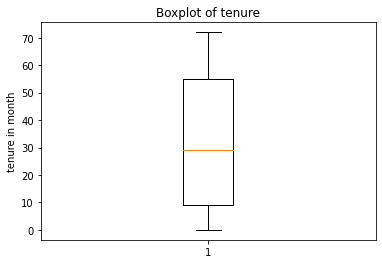

In [18]:
plt.boxplot(df['tenure'])
plt.ylabel('tenure in month')
plt.title('Boxplot of tenure')

In [19]:
q1 , q3 = np.percentile(sorted(df['tenure']),[25,75])
iqr = q3-q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print(f'Lower Bound:{lower_bound} Upper Bound: {upper_bound}')
for i in sorted(df['tenure']):
    if i<lower_bound or i>upper_bound:
        print(i)

Lower Bound:-60.0 Upper Bound: 124.0


### Correlation

In [20]:
list1 = [ 'tenure', 'MonthlyCharges', 'TotalCharges']
df1 = df.drop(list1,axis=1)
features = pd.Series(df1.drop(['Churn'], axis=1).columns).append(pd.Series(['SeniorCitizen']))

In [21]:
# this function creates will automaticall generate the decision for the chi square test
def chi_square_test(data, feature):
    df = pd.crosstab(data[feature],data['Churn'])
    stat, p, dof, expected = chi2_contingency(df)
    print(f'Chi-Square Test for {format(feature)}')

    print('degrees of freedom = %d' % dof)
    
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('Results:')
    print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
    print("\n")
    print('Decision based on Chi-Square Statistics:')

    alpha = 1.0 - prob
    
    print('Decision based on p-value:')
    print('alpha = %.2f, p = %.3f' % (alpha, p))
    if p <= alpha:
        print(f'The Churns are dependent on {format(feature)} : Dependent (reject H0)')
    else:
        print(f'The Churns are independent on {format(feature)} : Independent (fail to reject H0)')
    print('\n\n')
    print('_'*70)

In [22]:
for feature in features:
    chi_square_test(df, feature)

Chi-Square Test for gender
degrees of freedom = 1
Results:
probability = 0.950, critical = 3.841, stat = 0.484


Decision based on Chi-Square Statistics:
Decision based on p-value:
alpha = 0.05, p = 0.487
The Churns are independent on gender : Independent (fail to reject H0)



______________________________________________________________________
Chi-Square Test for SeniorCitizen
degrees of freedom = 1
Results:
probability = 0.950, critical = 3.841, stat = 159.426


Decision based on Chi-Square Statistics:
Decision based on p-value:
alpha = 0.05, p = 0.000
The Churns are dependent on SeniorCitizen : Dependent (reject H0)



______________________________________________________________________
Chi-Square Test for Partner
degrees of freedom = 1
Results:
probability = 0.950, critical = 3.841, stat = 158.733


Decision based on Chi-Square Statistics:
Decision based on p-value:
alpha = 0.05, p = 0.000
The Churns are dependent on Partner : Dependent (reject H0)



_________________________

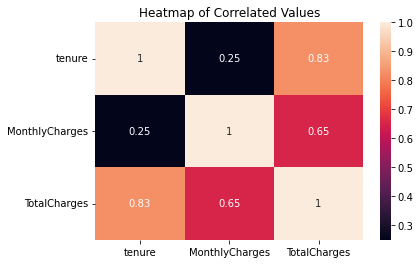

In [23]:
sns.heatmap(df.drop(['SeniorCitizen'],axis=1).corr(), annot=True)
plt.title('Heatmap of Correlated Values')
plt.show()

Text(0.5, 1.0, 'PPS Matrix')

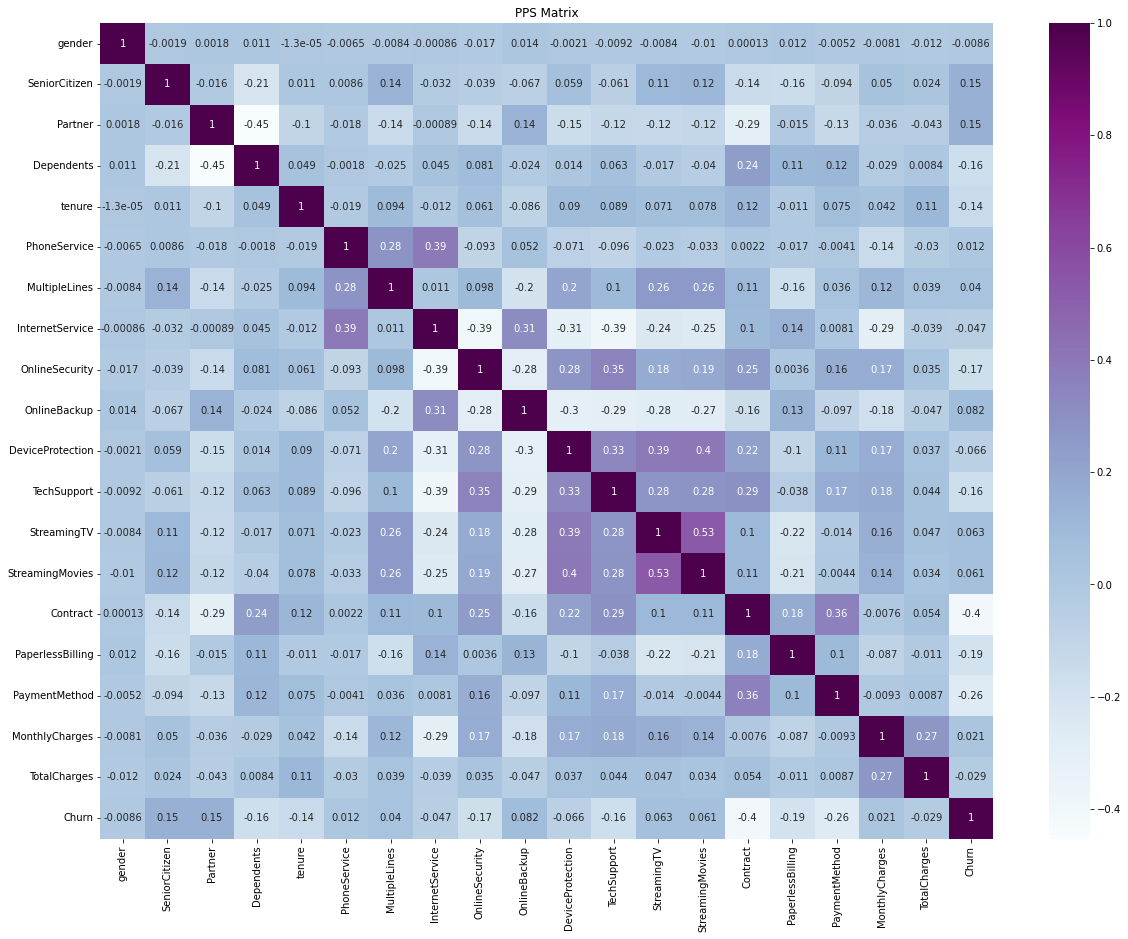

In [24]:
plt.figure(figsize=(20, 15))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr, cmap="BuPu", annot=True)
plt.title('PPS Matrix')

In [25]:
corr_df = pd.get_dummies(df.drop(['tenure'],axis = 1)).corr()
a = corr_df['Churn_Yes'].sort_values().iloc[1:-1]
a

Contract_Two year                         -0.302253
InternetService_No                        -0.227890
TotalCharges                              -0.198347
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
OnlineBackup_Yes                          -0.082255
DeviceProtection_Yes                      -0.066160
StreamingTV_No                            -0.063228
StreamingMovies_No                        -0.061382
MultipleLines_No                          -0.040102
PhoneService_No                           -0.011942
gender_Male 

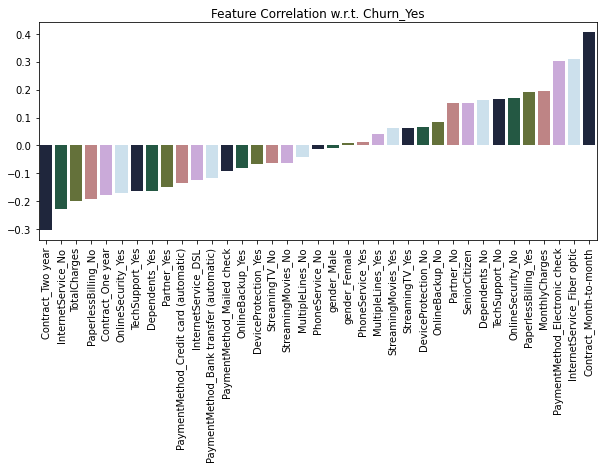

In [26]:
plt.figure(figsize=(10, 4))
sns.barplot(x= a.index, y= a.values, palette= sns.color_palette("cubehelix"))
plt.title("Feature Correlation w.r.t. Churn_Yes")
plt.xticks(rotation= 90)
plt.show()

### data reduction using pca

In [27]:
scalar = StandardScaler()
f1=['tenure','MonthlyCharges','TotalCharges']
scalar.fit(df[f1])
scaled_data = scalar.transform(df[f1])

In [28]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
print(data_pca)
data_pca.shape

[[-1.9484795   0.08348691]
 [-0.2030124   0.23543458]
 [-1.51486596 -0.5218208 ]
 ...
 [-1.62863341  0.34573144]
 [-1.07861369 -1.00829765]
 [ 2.7762044  -0.12246204]]


(7043, 2)

Text(0, 0.5, 'Second Principal Component')

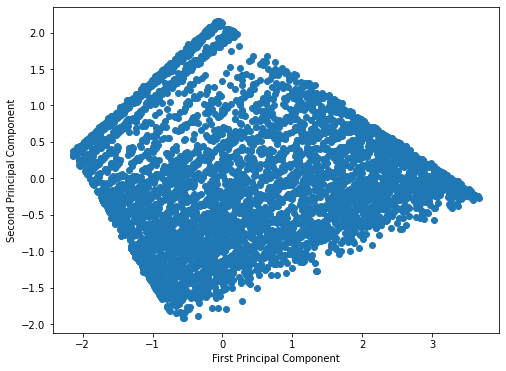

In [29]:
plt.figure(figsize =(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1],cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [30]:
pca.components_

array([[ 0.5672941 ,  0.48584803,  0.66492789],
       [ 0.60679666, -0.79248571,  0.0613532 ]])

### Normalize data with Z score

0      -1.160323
1      -0.259629
2      -0.362660
3      -0.746535
4       0.197365
          ...   
7038    0.665992
7039    1.277533
7040   -1.168632
7041    0.320338
7042    1.358961
Name: MonthlyCharges, Length: 7043, dtype: float64


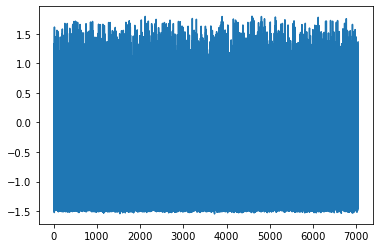

In [31]:
z1 = stats.zscore(df.MonthlyCharges)
plt.plot(z1)
print(z1)
plt.show()

0      -0.992667
1      -0.172198
2      -0.958122
3      -0.193706
4      -0.938930
          ...   
7038   -0.127637
7039    2.242641
7040   -0.852985
7041   -0.870566
7042    2.013925
Name: TotalCharges, Length: 7043, dtype: float64


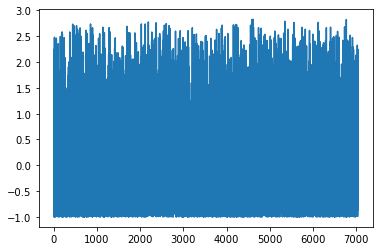

In [32]:
z2 = stats.zscore(df.TotalCharges)
plt.plot(z2)
print(z2)
plt.show()

0      -1.277445
1       0.066327
2      -1.236724
3       0.514251
4      -1.236724
          ...   
7038   -0.340876
7039    1.613701
7040   -0.870241
7041   -1.155283
7042    1.369379
Name: tenure, Length: 7043, dtype: float64


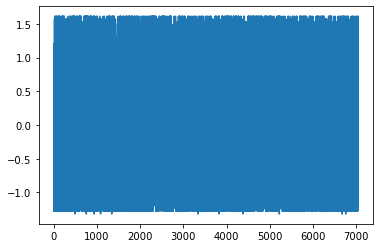

In [33]:
z3 = stats.zscore(df.tenure)
plt.plot(list(z3))
print(z3)
plt.show()